<a href="https://colab.research.google.com/github/S10859051/bigdata/blob/main/0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pkgs <- c("tidyverse","lubridate")
install.packages(pkgs)
install.packages("showtext")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [27]:
library(tidyverse)
library(lubridate)
library(showtext)
showtext.auto(enable=TRUE)

Loading required package: sysfonts

Loading required package: showtextdb

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



In [ ]:
nobel <- read.csv("nobel_winners.csv")
nobel

In [ ]:
nobel %>% count(category)

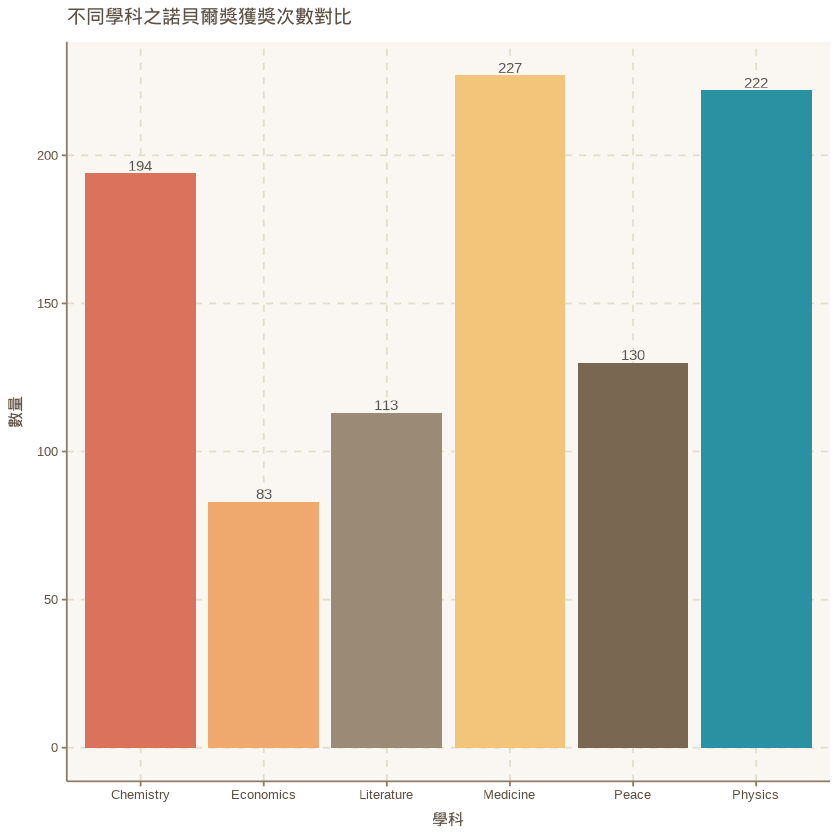

In [68]:
nobel %>%
  count(category) %>%
  ggplot(aes(x=category,y=n,fill=category))+
  geom_col() + 
  geom_text(aes(label=n),vjust=-0.25)+
  labs(title="不同學科之諾貝爾獎獲獎次數對比",x="學科",y="數量")+theme(legend.position = "none")


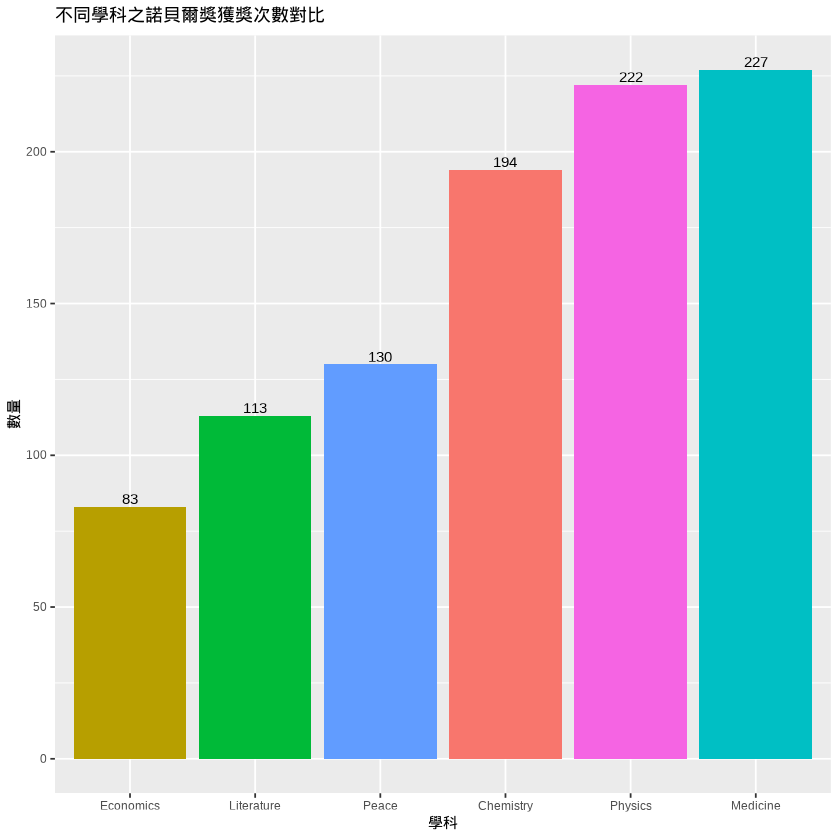

In [29]:
nobel %>%
  count(category) %>%
  ggplot(aes(x=fct_reorder(category,n) ,y=n,fill=category))+
  geom_col() + 
  geom_text(aes(label=n),vjust=-0.25)+
  labs(title="不同學科之諾貝爾獎獲獎次數對比",x="學科",y="數量")+theme(legend.position = "none")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggthemr' from a github remote, the SHA1 (4a31e0df) has not changed since last install.
  Use `force = TRUE` to force installation



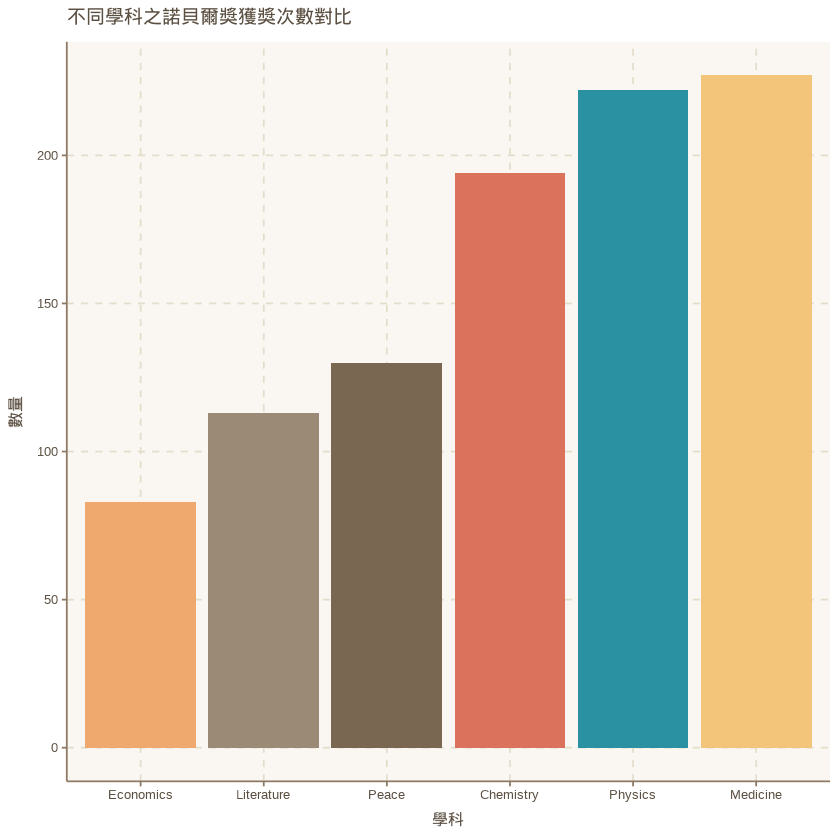

In [40]:
install.packages("devtools")
devtools::install_github('cttobin/ggthemr')



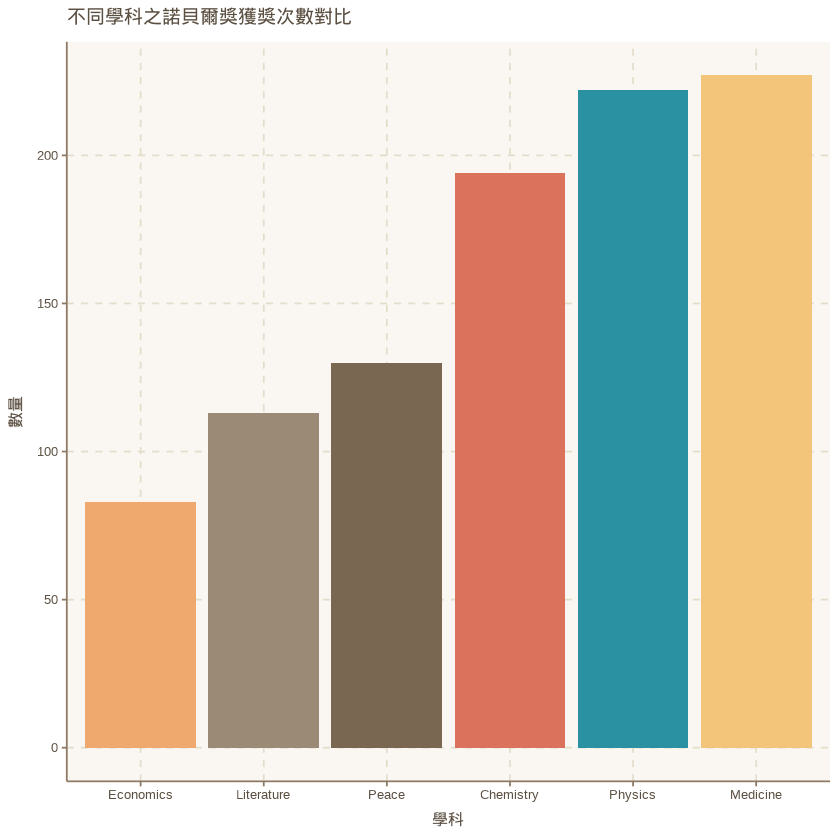

In [41]:
library(ggthemr)
ggthemr("dust")
nobel %>%
  count(category) %>%
  ggplot(aes(x=fct_reorder(category,n) ,y=n,fill=category))+
  geom_col() + 
  labs(title="不同學科之諾貝爾獎獲獎次數對比",x="學科",y="數量")+theme(legend.position = "none")

In [ ]:
nobel %>%
  count(category) %>%
  ggplot(aes(x=fct_reorder(category,n) ,y=n ))+
  geom_col(fill=c("#003f5c","#bc5090","#58508d","#dd5182","#ff6361","#ffa600")) + 
  labs(title="不同學科之諾貝爾獎獲獎次數對比",x="學科",y="數量")+
  theme(legend.position = "none")

In [ ]:
nobel %>%
  dplyr::filter(birth_country=="United States of America") %>%
  dplyr::select(full_name, prize_year, category)

In [58]:
nobel %>%
  dplyr::filter(birth_country=="Taiwan") %>%
  dplyr::select(full_name, prize_year, category)

full_name,prize_year,category
<chr>,<int>,<chr>
Yuan T. Lee,1986,Chemistry


In [ ]:
nobel_winners <- nobel %>%
  mutate_if(is.character,tolower) %>%
  distinct_at(vars(full_name,prize_year,category), .keep_all=TRUE) %>%
  mutate(
    dacade=10 * (prize_year %/% 10),
    prize_age = prize_year - year(birth_date)
  )
nobel_winners

In [ ]:
nobel_winners %>% count(full_name,sort=T)

In [ ]:
nobel_winners %>%
  count(prize_age) %>%
  ggplot(aes(x=prize_age,y=n))+
  geom_col()

In [ ]:
nobel_winners %>%
  group_by(category) %>%
  summarise(mean_prize_age = mean(prize_age, na.rm = T))

In [ ]:
nobel_winners %>%
  mutate(category = fct_reorder(category, prize_age, median, na.rm = TRUE)) %>%
  ggplot(aes(category, prize_age))+
  geom_point()+
  geom_boxplot()+
  coord_flip()

In [75]:
install.packages("ggridges")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Picking joint bandwidth of 3.78

Warning message:
“Removed 30 rows containing non-finite values (stat_density_ridges).”


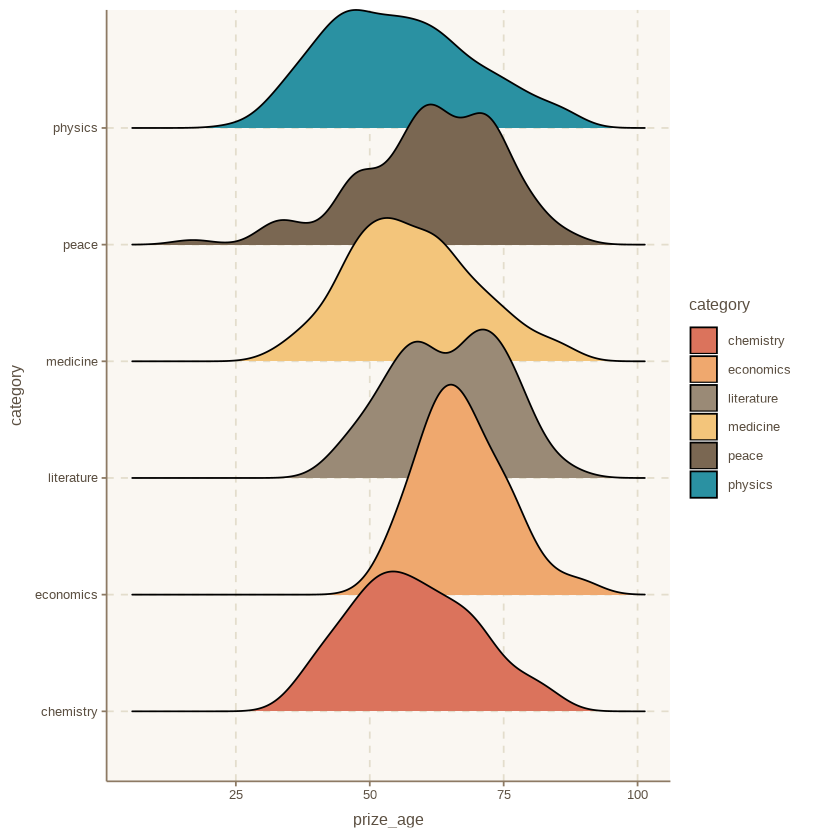

In [76]:
library(ggridges)
nobel_winners %>%
  ggplot(aes(
    x = prize_age,
    y = category,
    fill = category
  ))+
  geom_density_ridges()

In [ ]:
nobel_winners %>%
  dplyr::filter(laureate_type == "individual") %>%
  count(category, gender) %>%
  group_by(category) %>%
  mutate(prop = n/sum(n))

In [ ]:
install.packages("ggbeeswarm")
library(ggbeeswarm)

nobel_winners %>%
  ggplot(aes(
    x = category,
    y=prize_age,
    colour=gender,
    alpha=gender
  ))+
  ggbeeswarm::geom_beeswarm()+
  coord_flip()+
  scale_color_manual(values = c("#003f5c","#ff6361"))+
  scale_alpha_manual(values = c(1,-4))+
  theme_minimal()+
  theme(legend.position="top")+
  labs(
    title="諾貝爾獲獎者性別不平衡",
    subtitle="1901年~2016年數據",
    colour="Gender",
    alpha="Gender",
    x="學科",
    y="獲獎年齡"
  )

In [93]:
nobel_winners %>%
  count(decade,
    category,
    gender = coalesce(gender,laureate_type)
  ) %>%
  group_by(decade, category) %>%
  mutate(percent = n/sum(n)) %>%
  ggplot(aes(decade, n, fill=gender))+
  geom_col()+
  facet_wrap(~category)+
  labs(
    x="Decade",
    y="# of nobel prize winners",
    fill ="Gender",
    title="Nobel Prize gender distribution over time"
  )

ERROR: ignored